In [273]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [175]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, Column, Integer, String, Float, text

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
# Declare a Base using 'automap_base()'
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
# Assign the measurement class to a variable called 'Measurement'
Measurement = Base.classes.measurement

# Assign the station class to a variable called 'Station'
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [19]:
measurement = session.query(Measurement)
insp = inspect(engine)
columns = insp.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
station = session.query(Station)

In [25]:
# # Display Measurement's row's columns and data in dictionary format
# first_row_m = session.query(Measurement).first()
# first_row_m.__dict__

In [26]:
# # Display Station's row's columns and data in dictionary format
# first_row_s = session.query(Station).first()
# first_row_s.__dict__

# Exploratory Precipitation Analysis

In [166]:
# Find the most recent date in the data set.
measurement = session.query(Measurement)
# for row in session.query(Measurement.date).limit(15).all():
#     print(row)
session.query(func.max(Measurement.date)).first()
# query = text("SELECT Date FROM measurement ORDER BY Date DESC LIMIT 1;") #WHERE Date >=2010-01-01;")
# with engine.connect() as conn:
#     data = conn.execute(query)

# for record in data:
#     print(record)

# recent_date = record
# print(recent_date)


('2017-08-23',)

In [14]:
# Inspect Measurement Class
insp = inspect(engine)
columns_m = insp.get_columns('measurement')
for column in columns_m:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [1]:
from sqlalchemy import text

# ...

with engine.begin() as conn:
    query = text("""SELECT * FROM Measurement""")
    df = pd.read_sql_query(query, conn)

df.head()

##Didn't work...possible my version of sqlalchemy is old/too new...
# # Put into a Pandas DataFrame
# # measurement = session.query(Measurement)
# measurement_df = pd.read_sql_query(
#                 sql = measurement.statement,
#                 con = engine
# )

# measurement_df.head()

NameError: name 'engine' is not defined

In [24]:
# The most recent date in the data set.
print(df["date"].max())
last_date = df[["date"]].max()
last_date

2017-08-23


date    2017-08-23
dtype: object

Text(0, 0.5, 'Inches')

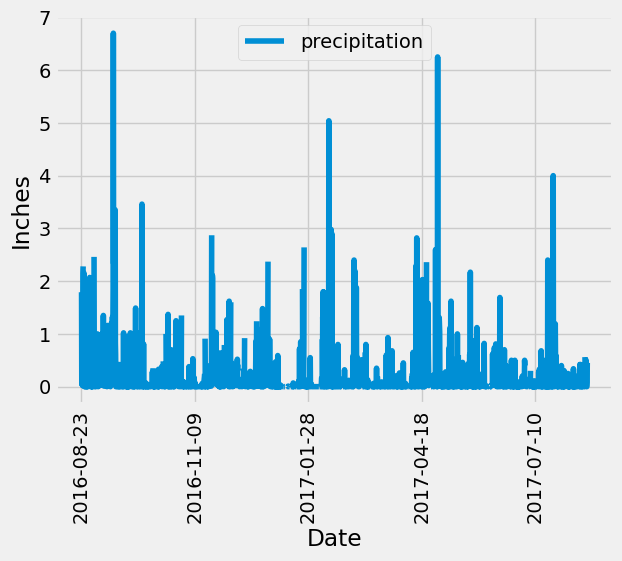

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(func.max(Measurement.date)).first()
# Calculate the date one year from the last date in data set.
date_one_year_ago  = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(date_one_year_ago)

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


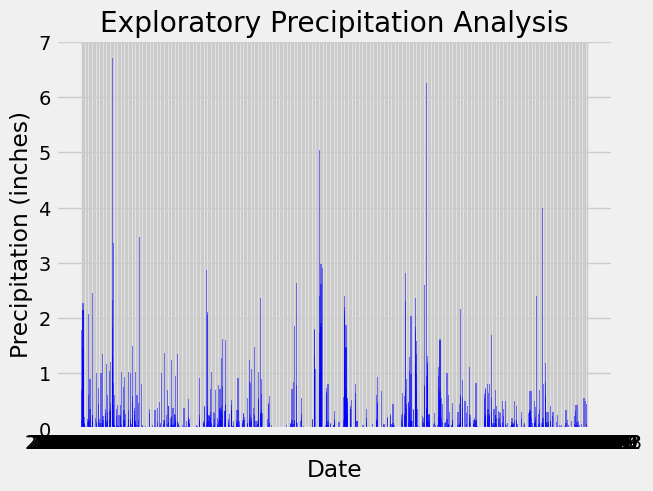

In [284]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(func.max(Measurement.date)).first()
#print(recent_date)

# Calculate the date one year from the last date in data set.
date_one_year_ago  = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print(date_one_year_ago)


# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_one_year_ago).all()
#print(query)
# for obj in session.query(Measurement).filter(text("Date<=recent_date and Date=date_one_year_ago")).all():
#     print(obj.date, obj.prcp)

# query = session.query((Measurement.date),(Measurement.prcp)).all()
# for row in query:
#     #while row[0] >= '2017-08-23' and row[0] <= '2016-08-23':
#     print(row[0], row[1])

    # if row[0] == recent_date and row[0]>=date_one_year_ago:
    #     print(row)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query, columns=['date', 'precipitation'])
# df =pd.read_sql_query(
#     sql = query.statement,
#     con = engine
# )
#df

# Sort the dataframe by date
sorted_df = df.sort_values(['date'], ascending=True)
#sorted_df
clean_and_sorted_df = sorted_df.dropna(how='any')
clean_and_sorted_df
# Use Pandas Plotting with Matplotlib to plot the data
x = clean_and_sorted_df['date']
y = clean_and_sorted_df['precipitation']
plt.bar(x, y, color = 'b', alpha = 0.5, align = 'center')
plt.title('Exploratory Precipitation Analysis')
#plt.xticks()

plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')

plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

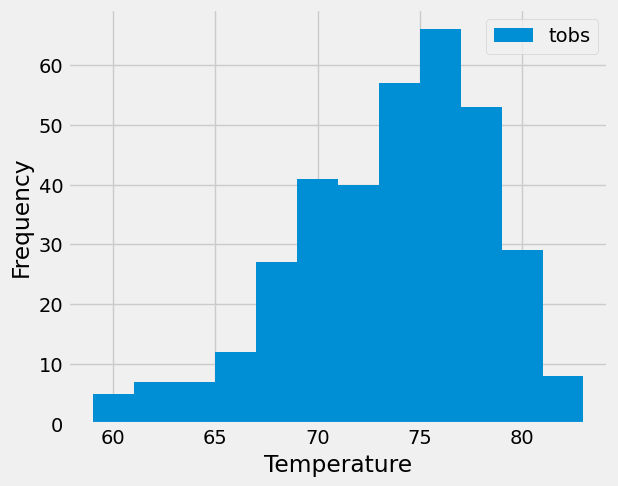

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()